In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm
import neurolab as nl
import random

In [10]:
####################Decison Boundry######################
###Data
Emp_Purchase_raw = pd.read_csv(r"C:\Users\SREEHARI\Desktop\internship\my training\Chapter8_ANN\Datasets\Emp_Purchase\Emp_Purchase.csv")

In [11]:
####Filter the data and take a subset from above dataset . Filter condition is Sample_Set<3
Emp_Purchase1=Emp_Purchase_raw[Emp_Purchase_raw.Sample_Set<3]
print(Emp_Purchase1.shape)
print(Emp_Purchase1.columns.values)
print(Emp_Purchase1.head(10))

(74, 4)
['Age' 'Experience' 'Purchase' 'Sample_Set']
    Age  Experience  Purchase  Sample_Set
0  20.0         2.3         0           1
1  16.2         2.2         0           1
2  20.2         1.8         0           1
3  18.8         1.4         0           1
4  18.9         3.2         0           1
5  16.7         3.9         0           1
6  16.3         1.4         0           1
7  20.0         1.4         0           1
8  18.0         3.6         0           1
9  21.2         4.3         0           1


In [12]:
#frequency table of Purchase variable
Emp_Purchase1.Purchase.value_counts()

1    41
0    33
Name: Purchase, dtype: int64

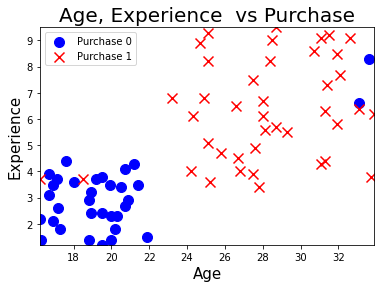

In [13]:
####The clasification graph
#Draw a scatter plot that shows Age on X axis and Experience on Y-axis. Try to distinguish the two classes with colors or shapes.

fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.rcParams["figure.figsize"] = (8,6)
plt.title('Age, Experience  vs Purchase', fontsize=20)

ax1.scatter(Emp_Purchase1.Age[Emp_Purchase1.Purchase==0],Emp_Purchase1.Experience[Emp_Purchase1.Purchase==0], s=100, c='b', marker="o", label='Purchase 0')
ax1.scatter(Emp_Purchase1.Age[Emp_Purchase1.Purchase==1],Emp_Purchase1.Experience[Emp_Purchase1.Purchase==1], s=100, c='r', marker="x", label='Purchase 1')
ax1.set_xlabel('Age',fontsize=15)
ax1.set_ylabel('Experience',fontsize=15)

plt.xlim(min(Emp_Purchase1.Age), max(Emp_Purchase1.Age))
plt.ylim(min(Emp_Purchase1.Experience), max(Emp_Purchase1.Experience))
plt.legend(loc='upper left');

plt.show()

In [14]:
###Logistic Regerssion model1
import statsmodels.formula.api as sm
model1 = sm.logit(formula='Purchase ~ Age+Experience', data=Emp_Purchase1)
fitted1 = model1.fit()
fitted1.summary()

Optimization terminated successfully.
         Current function value: 0.315987
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Purchase   No. Observations:                   74
Model:                          Logit   Df Residuals:                       71
Method:                           MLE   Df Model:                            2
Date:                Tue, 07 Feb 2023   Pseudo R-squ.:                  0.5402
Time:                        17:15:18   Log-Likelihood:                -23.383
converged:                       True   LL-Null:                       -50.860
Covariance Type:            nonrobust   LLR p-value:                 1.167e-12
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.9361      2.061     -4.335      0.000     -12.976      -4.896
Age            0.2763      0.105      2.620      0.009       0.070       0.483
Experience     0.5923      0.298      1.988      0.047       0.008       1.176
==============================================================================
"""

In [15]:
#######Accuracy and error of the model1
#Create the confusion matrix
predicted_values=fitted1.predict(Emp_Purchase1[["Age"]+["Experience"]])
predicted_values[1:10]
threshold=0.5

In [17]:
import numpy as np
predicted_class=np.zeros(predicted_values.shape)
predicted_class[predicted_values>threshold]=1
predicted_class

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [18]:
from sklearn.metrics import confusion_matrix as cm
ConfusionMatrix = cm(Emp_Purchase1[['Purchase']],predicted_class)
print(ConfusionMatrix)
accuracy=(ConfusionMatrix[0,0]+ConfusionMatrix[1,1])/sum(sum(ConfusionMatrix))
print('Accuracy : ',accuracy)
error=1-accuracy
print('Error: ',error)

[[31  2]
 [ 2 39]]
Accuracy :  0.9459459459459459
Error:  0.05405405405405406


In [19]:
#coefficients
slope1=fitted1.params[1]/(-fitted1.params[2])
intercept1=fitted1.params[0]/(-fitted1.params[2])

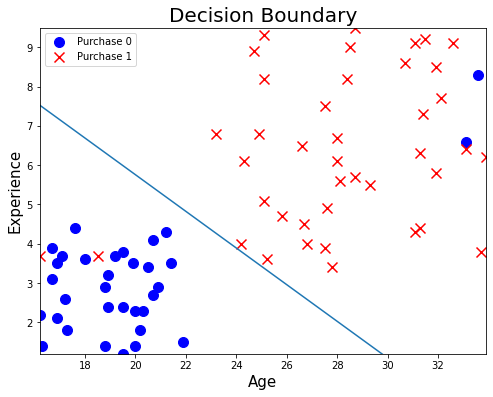

In [24]:
#Finally draw the decision boundary for this logistic regression model
      
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.rcParams["figure.figsize"] = (8,6)
plt.title('Decision Boundary', fontsize=20)

ax1.scatter(Emp_Purchase1.Age[Emp_Purchase1.Purchase==0],Emp_Purchase1.Experience[Emp_Purchase1.Purchase==0], s=100, c='b', marker="o", label='Purchase 0')
ax1.scatter(Emp_Purchase1.Age[Emp_Purchase1.Purchase==1],Emp_Purchase1.Experience[Emp_Purchase1.Purchase==1], s=100, c='r', marker="x", label='Purchase 1')
ax1.set_xlabel('Age',fontsize=15)
ax1.set_ylabel('Experience',fontsize=15)

plt.xlim(min(Emp_Purchase1.Age), max(Emp_Purchase1.Age))
plt.ylim(min(Emp_Purchase1.Experience), max(Emp_Purchase1.Experience))
plt.legend(loc='upper left');
x_min, x_max = ax1.get_xlim()
ax1.plot([0, x_max], [intercept1, x_max*slope1+intercept1])
plt.show()

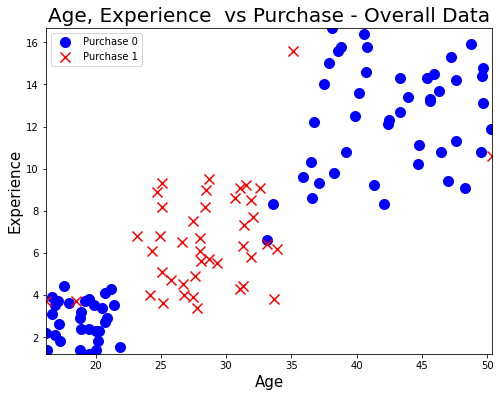

In [26]:
###########################################
####Overall Data 
############################################

##plotting the overall data

fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.rcParams["figure.figsize"] = (8,6)
plt.title('Age, Experience  vs Purchase - Overall Data', fontsize=20)

ax1.scatter(Emp_Purchase_raw.Age[Emp_Purchase_raw.Purchase==0],Emp_Purchase_raw.Experience[Emp_Purchase_raw.Purchase==0], s=100, c='b', marker="o", label='Purchase 0')
ax1.scatter(Emp_Purchase_raw.Age[Emp_Purchase_raw.Purchase==1],Emp_Purchase_raw.Experience[Emp_Purchase_raw.Purchase==1], s=100, c='r', marker="x", label='Purchase 1')
ax1.set_xlabel('Age',fontsize=15)
ax1.set_ylabel('Experience',fontsize=15)

plt.xlim(min(Emp_Purchase_raw.Age), max(Emp_Purchase_raw.Age))
plt.ylim(min(Emp_Purchase_raw.Experience), max(Emp_Purchase_raw.Experience))
plt.legend(loc='upper left');
plt.show()

In [27]:
###Logistic Regerssion model1
model = sm.logit(formula='Purchase ~ Age+Experience', data=Emp_Purchase_raw)
fitted = model.fit()
fitted.summary2()

Optimization terminated successfully.
         Current function value: 0.632202
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: 0.034   
Dependent Variable: Purchase         AIC:              156.4642
Date:               2023-02-07 18:53 BIC:              164.8015
No. Observations:   119              Log-Likelihood:   -75.232 
Df Model:           2                LL-Null:          -77.848 
Df Residuals:       116              LLR p-value:      0.073075
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
----------------------------------------------------------------
              Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
----------------------------------------------------------------
Intercept     0.4478    0.6987   0.6410  0.5215  -0.9215  1.8172
Age          -0.0176    0.0382  -0.4593  0.6460  -0.0925  0.0574
Experience   -0.0632    0.0906  -0.6979  0.4852  -0.2408  0.1144
===============================================================

"""

In [30]:
#getting slope and intercept of the line
slope=fitted.params[1]/(-fitted.params[2])
intercept=fitted.params[0]/(-fitted.params[2])

In [31]:
##Accuracy and error of the model1
#Create the confusion matrix
#predicting values
predicted_values=fitted.predict(Emp_Purchase_raw[["Age"]+["Experience"]])
predicted_values[1:10]

1    0.506088
2    0.494859
3    0.507326
4    0.478444
5    0.477034
6    0.518290
7    0.502061
8    0.476074
9    0.451103
dtype: float64

In [32]:
#Lets convert them to classes using a threshold
threshold=0.5
threshold

0.5

In [33]:
import numpy as np
predicted_class=np.zeros(predicted_values.shape)
predicted_class[predicted_values>threshold]=1

In [34]:
#Predcited Classes
predicted_class[1:10]

array([1., 0., 1., 0., 0., 1., 1., 0., 0.])

In [37]:
from sklearn.metrics import confusion_matrix as cm
ConfusionMatrix = cm(Emp_Purchase_raw[['Purchase']],predicted_class)
print(ConfusionMatrix)
accuracy=(ConfusionMatrix[0,0]+ConfusionMatrix[1,1])/sum(sum(ConfusionMatrix))
print(accuracy)

error=1-accuracy
error

[[69  7]
 [43  0]]
0.5798319327731093


0.4201680672268907

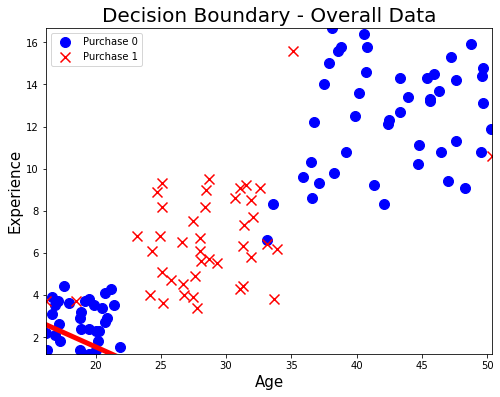

In [41]:
#Finally draw the decision boundary for this logistic regression model
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.rcParams["figure.figsize"] = (8,6)
plt.title('Decision Boundary - Overall Data', fontsize=20)

ax1.scatter(Emp_Purchase_raw.Age[Emp_Purchase_raw.Purchase==0],Emp_Purchase_raw.Experience[Emp_Purchase_raw.Purchase==0], s=100, c='b', marker="o", label='Purchase 0')
ax1.scatter(Emp_Purchase_raw.Age[Emp_Purchase_raw.Purchase==1],Emp_Purchase_raw.Experience[Emp_Purchase_raw.Purchase==1], s=100, c='r', marker="x", label='Purchase 1')
plt.xlim(min(Emp_Purchase_raw.Age), max(Emp_Purchase_raw.Age))
plt.ylim(min(Emp_Purchase_raw.Experience), max(Emp_Purchase_raw.Experience))
plt.legend(loc='upper left');
ax1.set_xlabel('Age',fontsize=15)
ax1.set_ylabel('Experience',fontsize=15)

x_min, x_max = ax1.get_xlim()
ax1.plot([0, x_max], [intercept, x_max*slope+intercept],linewidth=5, c='r')
plt.show()

In [42]:
############################################
####    Intermediate output Models
############################################

## h1 model
Emp_Purchase1=Emp_Purchase_raw[Emp_Purchase_raw.Sample_Set<3]
model1 = sm.logit(formula='Purchase ~ Age+Experience', data=Emp_Purchase1)
fitted1 = model1.fit()

Optimization terminated successfully.
         Current function value: 0.315987
         Iterations 7


In [43]:
##Predictions 
Emp_Purchase_raw['h1']=fitted1.predict(Emp_Purchase_raw[["Age"]+["Experience"]])

In [44]:
## h2 model 
Emp_Purchase2=Emp_Purchase_raw[Emp_Purchase_raw.Sample_Set>1]
model2 = sm.logit(formula='Purchase ~ Age+Experience', data=Emp_Purchase2)
fitted2 = model2.fit(method="bfgs")

Optimization terminated successfully.
         Current function value: 0.198139
         Iterations: 24
         Function evaluations: 27
         Gradient evaluations: 27


In [45]:
##Predictions 
Emp_Purchase_raw['h2']=fitted2.predict(Emp_Purchase_raw[["Age"]+["Experience"]])

In [46]:
##h1 and h2 in the data
print(Emp_Purchase_raw[['Age', 'Experience','h1','h2','Purchase']])

      Age  Experience        h1        h2  Purchase
0    20.0         2.3  0.114232  0.999578         0
1    16.2         2.2  0.040805  0.999910         0
2    20.2         1.8  0.092027  0.999595         0
3    18.8         1.4  0.051521  0.999790         0
4    18.9         3.2  0.139552  0.999661         0
..    ...         ...       ...       ...       ...
114  48.8        15.9  0.999999  0.000865         0
115  48.3         9.1  0.999944  0.005522         0
116  45.4        14.3  0.999994  0.004948         0
117  40.8        15.8  0.999992  0.021197         0
118  49.5        10.8  0.999985  0.002266         0

[119 rows x 5 columns]


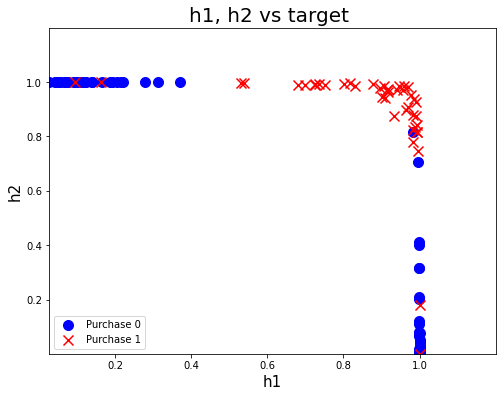

In [48]:
##plotting the h1, h2 vs target

fig = plt.figure()
ax = fig.add_subplot(111)
plt.rcParams["figure.figsize"] = (8,6)
plt.title('h1, h2 vs target ', fontsize=20)

ax.scatter(Emp_Purchase_raw.h1[Emp_Purchase_raw.Purchase==0],Emp_Purchase_raw.h2[Emp_Purchase_raw.Purchase==0], s=100, c='b', marker="o", label='Purchase 0')
ax.scatter(Emp_Purchase_raw.h1[Emp_Purchase_raw.Purchase==1],Emp_Purchase_raw.h2[Emp_Purchase_raw.Purchase==1], s=100, c='r', marker="x", label='Purchase 1')
ax.set_xlabel('h1',fontsize=15)
ax.set_ylabel('h2',fontsize=15)

plt.xlim(min(Emp_Purchase_raw.h1), max(Emp_Purchase_raw.h1)+0.2)
plt.ylim(min(Emp_Purchase_raw.h2), max(Emp_Purchase_raw.h2)+0.2)

plt.legend(loc='lower left');
plt.show()

In [49]:
###Logistic Regerssion model with Intermediate outputs as input
model_combined = sm.logit(formula='Purchase ~ h1+h2', data=Emp_Purchase_raw)
fitted_combined = model_combined.fit(method="bfgs")
fitted_combined.summary()

Optimization terminated successfully.
         Current function value: 0.208985
         Iterations: 26
         Function evaluations: 27
         Gradient evaluations: 27


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Purchase   No. Observations:                  119
Model:                          Logit   Df Residuals:                      116
Method:                           MLE   Df Model:                            2
Date:                Tue, 07 Feb 2023   Pseudo R-squ.:                  0.6805
Time:                        18:58:56   Log-Likelihood:                -24.869
converged:                       True   LL-Null:                       -77.848
Covariance Type:            nonrobust   LLR p-value:                 9.805e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.2134      1.907     -6.405      0.000     -15.951      -8.476
h1             8.0193      1.409      5.693      0.000       5.258      10.780
h2             8.5983      1.509      5.697      0.000       5.640      11.556
==============================================================================
"""

In [50]:
# getting slope and intercept of the line
slope_combined=fitted_combined.params[1]/(-fitted_combined.params[2])
intercept_combined=fitted_combined.params[0]/(-fitted_combined.params[2])

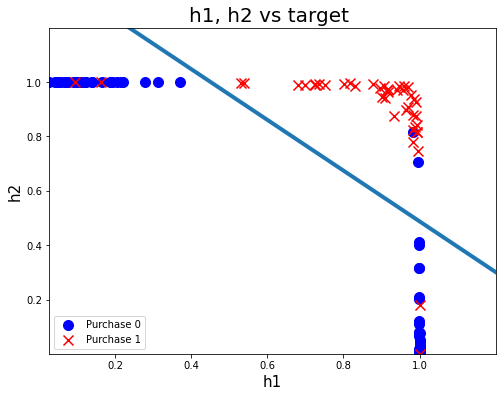

In [51]:
##Finally draw the decision boundary for this logistic regression model
fig = plt.figure()
ax2 = fig.add_subplot(111)
plt.rcParams["figure.figsize"] = (8,7)
plt.title('h1, h2 vs target ', fontsize=20)

ax2.scatter(Emp_Purchase_raw.h1[Emp_Purchase_raw.Purchase==0],Emp_Purchase_raw.h2[Emp_Purchase_raw.Purchase==0], s=100, c='b', marker="o", label='Purchase 0')
ax2.scatter(Emp_Purchase_raw.h1[Emp_Purchase_raw.Purchase==1],Emp_Purchase_raw.h2[Emp_Purchase_raw.Purchase==1], s=100, c='r', marker="x", label='Purchase 1')
ax2.set_xlabel('h1',fontsize=15)
ax2.set_ylabel('h2',fontsize=15)

plt.xlim(min(Emp_Purchase_raw.h1), max(Emp_Purchase_raw.h1)+0.2)
plt.ylim(min(Emp_Purchase_raw.h2), max(Emp_Purchase_raw.h2)+0.2)

plt.legend(loc='lower left');

x_min, x_max = ax2.get_xlim()
y_min,y_max=ax2.get_ylim()
ax2.plot([x_min, x_max], [x_min*slope_combined+intercept_combined, x_max*slope_combined+intercept_combined],linewidth=4)
plt.show()

In [52]:
#######Accuracy and error of the model
#Create the confusion matrix
#Predciting Values
predicted_values=fitted_combined.predict(Emp_Purchase_raw[["h1"]+["h2"]])
predicted_values[1:10]

1    0.035962
2    0.053121
3    0.039025
4    0.075934
5    0.064717
6    0.032195
7    0.045050
8    0.075197
9    0.341389
dtype: float64

In [53]:
#Lets convert them to classes using a threshold
threshold=0.5
threshold

0.5

In [54]:
import numpy as np
predicted_class=np.zeros(predicted_values.shape)
predicted_class[predicted_values>threshold]=1

In [55]:
from sklearn.metrics import confusion_matrix as cm
ConfusionMatrix = cm(Emp_Purchase_raw[['Purchase']],predicted_class)
print("ConfusionMatrix\n", ConfusionMatrix)
accuracy=(ConfusionMatrix[0,0]+ConfusionMatrix[1,1])/sum(sum(ConfusionMatrix))
print("accuracy\n", accuracy)

ConfusionMatrix
 [[74  2]
 [ 4 39]]
accuracy
 0.9495798319327731


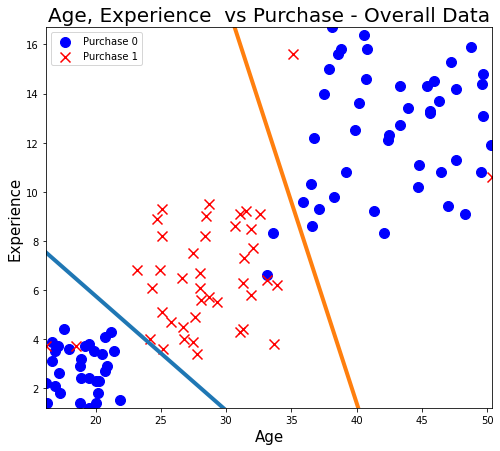

In [56]:
##the two decison boundries
slope1=fitted1.params[1]/(-fitted1.params[2])
intercept1=fitted1.params[0]/(-fitted1.params[2])

slope2=fitted2.params[1]/(-fitted2.params[2])
intercept2=fitted2.params[0]/(-fitted2.params[2])

fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.rcParams["figure.figsize"] = (8,6)
plt.title('Age, Experience  vs Purchase - Overall Data', fontsize=20)


ax1.scatter(Emp_Purchase_raw.Age[Emp_Purchase_raw.Purchase==0],Emp_Purchase_raw.Experience[Emp_Purchase_raw.Purchase==0], s=100, c='b', marker="o", label='Purchase 0')
ax1.scatter(Emp_Purchase_raw.Age[Emp_Purchase_raw.Purchase==1],Emp_Purchase_raw.Experience[Emp_Purchase_raw.Purchase==1], s=100, c='r', marker="x", label='Purchase 1')
ax1.set_xlabel('Age',fontsize=15)
ax1.set_ylabel('Experience',fontsize=15)

plt.xlim(min(Emp_Purchase_raw.Age), max(Emp_Purchase_raw.Age))
plt.ylim(min(Emp_Purchase_raw.Experience), max(Emp_Purchase_raw.Experience))

x_min, x_max = ax1.get_xlim()
ax1.plot([0, x_max], [intercept1, x_max*slope1+intercept1],linewidth=4)
ax1.plot([0, x_max], [intercept2, x_max*slope2+intercept2],linewidth=4)

plt.legend(loc='upper left');
plt.show()

In [57]:
###############################
##Gradinet Descent for liner regression
def lr_gd(X, y, w1, w0, learning_rate, epochs):
     for i in range(epochs):
          y_pred = (w1 * X) + w0
          error = sum([k**2 for k in (y-y_pred)])
          
          ##Gradients
          w0_gradient = -sum(y - y_pred)
          w1_gradient = -sum(X * (y - y_pred))
          
          ##Weight Updating
          w0 = w0 - (learning_rate * w0_gradient)
          w1 = w1 - (learning_rate * w1_gradient)
          
          print("epoch", i, "error =>", round(error,2), "w0 => ", round(w0,2), "w1 => ",round(w1,2))
     return error, w0, w1

In [58]:
##Using the GD function
x_data=np.random.random(10)
y_data= x_data*20 + 10 

w0_init=5
w1_init=10

lr_gd(X=x_data, y=y_data, w1=w1_init, w0=w0_init, learning_rate=0.01, epochs=600)

epoch 0 error => 1299.24 w0 =>  6.1 w1 =>  10.75
epoch 1 error => 968.31 w0 =>  7.05 w1 =>  11.39
epoch 2 error => 722.8 w0 =>  7.87 w1 =>  11.95
epoch 3 error => 540.64 w0 =>  8.57 w1 =>  12.44
epoch 4 error => 405.47 w0 =>  9.17 w1 =>  12.86
epoch 5 error => 305.16 w0 =>  9.68 w1 =>  13.23
epoch 6 error => 230.71 w0 =>  10.12 w1 =>  13.55
epoch 7 error => 175.43 w0 =>  10.5 w1 =>  13.83
epoch 8 error => 134.38 w0 =>  10.82 w1 =>  14.08
epoch 9 error => 103.89 w0 =>  11.1 w1 =>  14.29
epoch 10 error => 81.22 w0 =>  11.33 w1 =>  14.48
epoch 11 error => 64.36 w0 =>  11.54 w1 =>  14.64
epoch 12 error => 51.81 w0 =>  11.71 w1 =>  14.79
epoch 13 error => 42.45 w0 =>  11.85 w1 =>  14.92
epoch 14 error => 35.46 w0 =>  11.97 w1 =>  15.03
epoch 15 error => 30.23 w0 =>  12.08 w1 =>  15.13
epoch 16 error => 26.31 w0 =>  12.16 w1 =>  15.22
epoch 17 error => 23.36 w0 =>  12.23 w1 =>  15.3
epoch 18 error => 21.12 w0 =>  12.3 w1 =>  15.38
epoch 19 error => 19.42 w0 =>  12.35 w1 =>  15.45
epoch 20 er

(0.019493883153989727, 10.099116808854887, 19.845408386453972)

In [59]:
####################################################
########Case Study – Recognizing Handwritten Digits 
##################################################

####Image importing

x=plt.imread(r"C:\Users\SREEHARI\Desktop\internship\my training\Chapter8_ANN\Datasets\Sample_images\Marketvegetables.jpg")

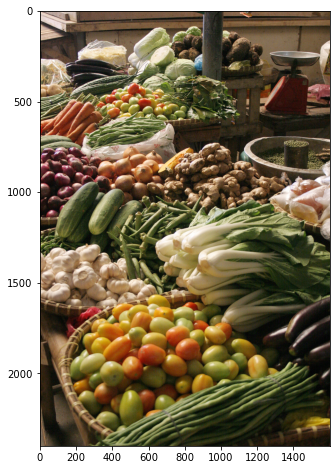

In [60]:
plt.rcParams["figure.figsize"] = (12,8)
plt.imshow(x)

In [61]:
print('Shape of the image',x.shape) 
print(x)

Shape of the image (2400, 1600, 3)
[[[100  85  82]
  [103  89  86]
  [108  97  91]
  ...
  [111  88  74]
  [ 98  74  64]
  [105  80  73]]

 [[164 122 126]
  [128  87  91]
  [ 80  41  42]
  ...
  [ 98  75  59]
  [104  82  69]
  [105  83  72]]

 [[213 171 173]
  [199 155 156]
  [170 121 124]
  ...
  [105  84  63]
  [109  90  73]
  [ 93  74  59]]

 ...

 [[142 123 108]
  [150 131 117]
  [144 124 113]
  ...
  [ 32  22  20]
  [ 47  34  28]
  [ 49  26  20]]

 [[140 122 100]
  [143 122 105]
  [142 120 106]
  ...
  [ 41  25  25]
  [ 53  29  29]
  [ 56  18  17]]

 [[131 113  89]
  [132 111  90]
  [134 111  95]
  ...
  [ 30   8  10]
  [ 46  11  15]
  [ 59   6  12]]]


In [62]:
##Data Importing
#Importing test and training data

digits_data_raw = np.loadtxt(r"C:\Users\SREEHARI\Desktop\internship\my training\Chapter8_ANN\Datasets\USPS\USPS_train.txt")

In [63]:
##Input data is in nparry format. we convert it into dataframe for better handling
digits_data=pd.DataFrame(digits_data_raw)

In [64]:
#Shape of the data
print(digits_data.shape)

(7291, 257)


In [65]:
##Details of the data
print(digits_data.head())

   0    1    2    3      4      5      6      7      8      9    ...    247  \
0  6.0 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -0.631  0.862  ...  0.304   
1  5.0 -1.0 -1.0 -1.0 -0.813 -0.671 -0.809 -0.887 -0.671 -0.853  ... -0.671   
2  4.0 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000  ... -1.000   
3  7.0 -1.0 -1.0 -1.0 -1.000 -1.000 -0.273  0.684  0.960  0.450  ... -0.318   
4  3.0 -1.0 -1.0 -1.0 -1.000 -1.000 -0.928 -0.204  0.751  0.466  ...  0.466   

     248    249    250    251    252    253    254    255  256  
0  0.823  1.000  0.482 -0.474 -0.991 -1.000 -1.000 -1.000 -1.0  
1 -0.671 -0.033  0.761  0.762  0.126 -0.095 -0.671 -0.828 -1.0  
2 -1.000 -1.000 -0.109  1.000 -0.179 -1.000 -1.000 -1.000 -1.0  
3  1.000  0.536 -0.987 -1.000 -1.000 -1.000 -1.000 -1.000 -1.0  
4  0.639  1.000  1.000  0.791  0.439 -0.199 -0.883 -1.000 -1.0  

[5 rows x 257 columns]


In [66]:
##Frequency count of target
print(digits_data[0:][0].value_counts())

0.0    1194
1.0    1005
2.0     731
6.0     664
3.0     658
4.0     652
7.0     645
9.0     644
5.0     556
8.0     542
Name: 0, dtype: int64


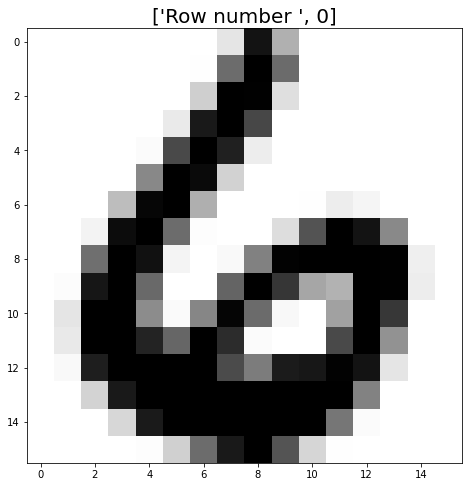

In [67]:
#Lets see some images.
#first image
i=0
data_row=digits_data_raw[i][1:]
pixels = np.matrix(data_row)
pixels=pixels.reshape(16,16)
plt.title(["Row number ", i] , fontsize=20)
plt.imshow(pixels, cmap='Greys')

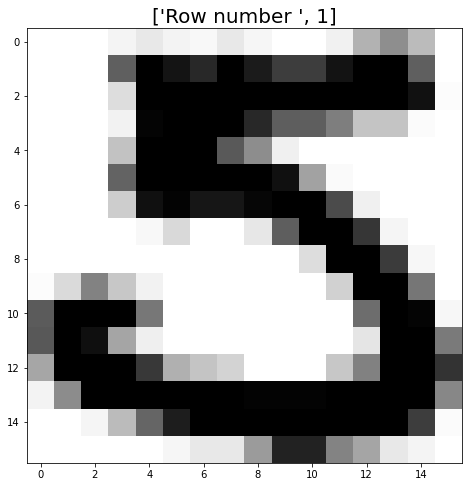

In [68]:
#second image
i=1
data_row=digits_data_raw[i][1:]
pixels = np.matrix(data_row)
pixels=pixels.reshape(16,16)
plt.title(["Row number ", i] , fontsize=20)
plt.imshow(pixels, cmap='Greys')

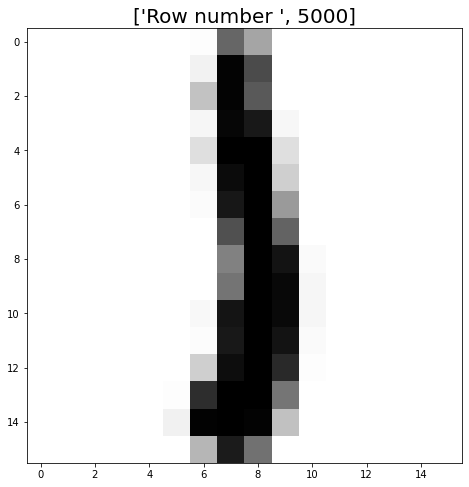

In [69]:
#Few more images try i=100, 350, 1000, 5500
i=5000 
data_row=digits_data_raw[i][1:]
pixels = np.matrix(data_row)
pixels=pixels.reshape(16,16)
plt.title(["Row number ", i] , fontsize=20)
plt.imshow(pixels, cmap='Greys')

In [70]:
##Train and Test data creation
X=digits_data.drop(digits_data.columns[[0]], axis=1)
y=digits_data[0:][0]

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=33)

In [71]:
#Shape of the data
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (5832, 256)
y_train shape (5832,)
X_test shape (1459, 256)
y_test shape (1459,)


In [72]:
#Creating multiple binary columns for multiple outputs
#####We need these variables while building the model
digit_labels=pd.DataFrame()

In [73]:
#Convert target into onehot encoding
digit_labels = pd.get_dummies(y_train)

In [74]:
#see our newly created labels data
digit_labels.head(10)

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
7140,0,0,0,0,0,1,0,0,0,0
2853,0,1,0,0,0,0,0,0,0,0
3941,0,0,0,0,0,1,0,0,0,0
1896,0,1,0,0,0,0,0,0,0,0
3306,0,0,1,0,0,0,0,0,0,0
1548,0,0,0,0,0,0,0,1,0,0
3089,1,0,0,0,0,0,0,0,0,0
511,0,0,0,1,0,0,0,0,0,0
141,0,0,0,0,1,0,0,0,0,0
6188,0,0,0,0,0,0,0,1,0,0


In [75]:
#########Neural network building

#getting minimum and maximum of each column of x_train into a list
min_max_all_cols=[[X_train[i][0:].min(), X_train[i][0:].max()] for i in range(1,X_train.shape[1]+1)]

In [76]:
print(len(min_max_all_cols))
print(min_max_all_cols)

256
[[-1.0, 0.638], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 0.752], [-1.0, 0.776], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 0.997], [-1.0, 0.796], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 0.937], [-1.0, 0.862], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 0.908], [-1.0, 0.901], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-1.0, 1.0], [-

In [77]:
##Configure the network

net = nl.net.newff(minmax=min_max_all_cols,size=[20,10],transf=[nl.trans.LogSig()]*2)

In [78]:
#Training method is Resilient Backpropagation method
net.trainf = nl.train.train_rprop

In [79]:
##Train the network
net.train(X_train, digit_labels, show=1, epochs=300)

Epoch: 1; Error: 14978.792540818336;
Epoch: 2; Error: 6980.140750289726;
Epoch: 3; Error: 4622.197329552798;
Epoch: 4; Error: 2885.683778357247;
Epoch: 5; Error: 2374.2691223960833;
Epoch: 6; Error: 2371.0989637499906;
Epoch: 7; Error: 2046.5449384022006;
Epoch: 8; Error: 1892.449202154543;
Epoch: 9; Error: 1691.3732185500508;
Epoch: 10; Error: 1545.0375695404746;
Epoch: 11; Error: 1412.870167389555;
Epoch: 12; Error: 1293.3402120890491;
Epoch: 13; Error: 1149.0466162912614;
Epoch: 14; Error: 995.0891539652985;
Epoch: 15; Error: 810.2436113355756;
Epoch: 16; Error: 735.2486885264871;
Epoch: 17; Error: 667.4441900481567;
Epoch: 18; Error: 597.2569177145801;
Epoch: 19; Error: 547.7847802744806;
Epoch: 20; Error: 508.0524323541638;
Epoch: 21; Error: 473.8901516868833;
Epoch: 22; Error: 444.4031673725362;
Epoch: 23; Error: 416.0535204974783;
Epoch: 24; Error: 391.5771668113583;
Epoch: 25; Error: 369.0123498247659;
Epoch: 26; Error: 349.3037363038226;
Epoch: 27; Error: 331.82759743333486;
E

C:\Users\SREEHARI\anaconda3\envs\tfgpu\lib\site-packages\neurolab\trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch: 105; Error: 90.67697163865304;
Epoch: 106; Error: 89.98983027446977;
Epoch: 107; Error: 89.38909303356786;
Epoch: 108; Error: 88.77377071665882;
Epoch: 109; Error: 88.16509437621096;
Epoch: 110; Error: 87.5559515413384;
Epoch: 111; Error: 86.95680436370316;
Epoch: 112; Error: 86.33513864660397;
Epoch: 113; Error: 85.69162052762341;
Epoch: 114; Error: 85.05247294995158;
Epoch: 115; Error: 84.41898345743118;
Epoch: 116; Error: 83.78341882360372;
Epoch: 117; Error: 83.21529711117763;
Epoch: 118; Error: 82.72413699214651;
Epoch: 119; Error: 82.20745031472575;
Epoch: 120; Error: 81.68976422303588;
Epoch: 121; Error: 81.1014576422253;
Epoch: 122; Error: 80.56451320585393;
Epoch: 123; Error: 80.01204112193604;
Epoch: 124; Error: 79.4257588824455;
Epoch: 125; Error: 78.84189612747514;
Epoch: 126; Error: 78.26560626007173;
Epoch: 127; Error: 77.69793407532488;
Epoch: 128; Error: 77.12895888238897;
Epoch: 129; Error: 76.51919770058954;
Epoch: 130; Error: 75.88323522913159;
Epoch: 131; Err

[14978.792540818336,
 6980.140750289726,
 4622.197329552798,
 2885.683778357247,
 2374.2691223960833,
 2371.0989637499906,
 2046.5449384022006,
 1892.449202154543,
 1691.3732185500508,
 1545.0375695404746,
 1412.870167389555,
 1293.3402120890491,
 1149.0466162912614,
 995.0891539652985,
 810.2436113355756,
 735.2486885264871,
 667.4441900481567,
 597.2569177145801,
 547.7847802744806,
 508.0524323541638,
 473.8901516868833,
 444.4031673725362,
 416.0535204974783,
 391.5771668113583,
 369.0123498247659,
 349.3037363038226,
 331.82759743333486,
 316.28063176773856,
 303.58759624083814,
 291.2129106217248,
 279.5527547810072,
 268.8792621620684,
 259.2187562773745,
 250.52495124943,
 241.4611416654613,
 233.48149141744213,
 225.7334335917792,
 218.77880807159127,
 212.37626182012846,
 206.84550195516005,
 202.32493396222262,
 197.47886113921896,
 193.24671427664757,
 188.9837471892791,
 184.65285933137906,
 180.55239602627535,
 176.49469303794518,
 172.68494271617647,
 168.8469227688906,


In [80]:
#Model results
## Input to Hidden layer weights 
print(net.layers[0].np['w'])
print(net.layers[0].np['b'])

[[ 0.21884924  0.31691469  0.07111059 ... -0.31457212 -0.00618267
  -0.01819934]
 [ 0.31709975  0.1463405   0.12261897 ...  0.05627196  0.05796587
  -0.41588569]
 [-0.53420219 -0.02392288  0.1182922  ... -0.15088141 -0.27024323
  -0.06362718]
 ...
 [ 0.14119772 -0.13486689  0.26068035 ... -0.18226806 -0.16309677
   0.0584201 ]
 [-0.23361516  0.24261239 -0.14927904 ... -0.04996118  0.03769373
  -0.05418571]
 [-0.16145734  0.40951334  0.11160864 ...  0.29884422 -0.08681538
  -0.15186814]]
[-2.92595911 -2.47906335  2.21756392  2.05461187  2.20991729 -0.78977151
  1.37069371 -0.81340036  0.73250625 -0.48252908  0.39185101 -0.3755117
  0.6198997  -0.98649872 -1.59237592 -1.72653076 -1.22560895  2.27143463
 -2.73035615 -3.0929674 ]


In [81]:
## Hidden to Output layer weights 
print(net.layers[1].np['w'])
print(net.layers[1].np['b'])

[[-3.03922643e+00 -6.88277119e+00  1.64867302e+00 -8.64998381e-01
   1.71031911e+00  2.58474626e-01 -1.85092056e+00 -5.47063197e+00
  -7.91540583e+00  4.76104568e+00 -6.44771539e+01  9.12080778e-01
  -4.53104287e-01 -1.73895362e+01  1.24719469e+01 -1.67246471e+00
  -2.79982616e+00 -3.19937093e+00 -7.66720353e-01  4.35025749e+00]
 [-1.14112626e+02 -1.78049142e+01  1.59204208e+00 -9.98577353e-01
   1.15821961e+00  6.77840784e-02  7.19843986e+00  3.48482223e+00
   1.39110402e+00 -1.82441266e+01  1.00296832e+01 -1.19113317e+01
  -6.50683494e+00 -1.25338345e+00 -1.86841907e+00  5.13947140e-01
   1.59216636e+00 -1.18578075e+00  5.14335033e+00 -1.54806221e+02]
 [ 5.76072979e+00 -4.79217621e+00 -5.63309805e+00  2.64677722e+00
  -1.25431729e+00 -5.27652165e+00 -3.44887591e+00  1.94333671e+00
  -2.99242918e+00  1.98611265e+00  5.21231345e+00  1.92230194e+00
   2.04437256e+00 -4.56846999e+00  5.66995484e+00 -3.17578610e+00
   1.66375294e+00  2.04724141e+00 -4.50598292e+00 -2.51801136e+01]
 [ 5.46

In [82]:
##Shape of the weights
print(net.layers[0].np['w'].shape)
print(net.layers[0].np['b'].shape)
print(net.layers[1].np['w'].shape)
print(net.layers[1].np['b'].shape)

(20, 256)
(20,)
(10, 20)
(10,)


In [83]:
# Prediction on test data
predicted_values = net.sim(X_test)
predicted=pd.DataFrame(predicted_values)
print(round(predicted.head(10),3))

     0    1      2      3      4      5    6      7      8    9
0  0.0  0.0  0.000  0.000  0.031  0.000  1.0  0.000  0.000  0.0
1  0.0  1.0  0.000  0.000  0.001  0.000  0.0  0.000  0.001  0.0
2  0.0  0.0  0.000  0.092  0.000  0.558  0.0  0.000  0.399  0.0
3  0.0  0.0  0.055  0.001  0.000  0.000  0.0  1.000  0.000  0.0
4  0.0  1.0  0.000  0.000  0.000  0.000  0.0  0.006  0.000  0.0
5  0.0  1.0  0.000  0.000  0.000  0.000  0.0  0.000  0.000  0.0
6  0.0  0.0  0.000  0.000  0.173  0.000  0.0  0.994  0.000  0.0
7  0.0  0.0  0.000  0.000  0.000  0.993  0.0  0.000  0.000  0.0
8  0.0  1.0  0.000  0.000  0.001  0.000  0.0  0.000  0.000  0.0
9  0.0  0.0  0.000  1.000  0.000  0.000  0.0  0.000  0.000  0.0


In [84]:
#Converting predicted probabilities into numbers
predicted_number=predicted.idxmax(axis=1)
print(predicted_number.head(15))

0     6
1     1
2     5
3     7
4     1
5     1
6     7
7     5
8     1
9     3
10    5
11    8
12    0
13    0
14    0
dtype: int64


In [85]:
##Accuracy calculation on test data
#confusion matrix
ConfusionMatrix = cm(y_test,predicted_number)
print("ConfusionMatrix on test data \n", ConfusionMatrix)

ConfusionMatrix on test data 
 [[260   0   1   2   0   2   0   0   2   0]
 [  0 195   0   0   2   0   0   0   0   0]
 [  5   1 125   1   2   0   2   1   1   0]
 [  0   1   5 124   0   5   0   0   0   2]
 [  0   2   3   0 112   0   2   0   3   1]
 [  1   0   1   3   2 100   2   1   1   2]
 [  2   0   1   0   1   2 122   0   0   0]
 [  0   0   0   2   0   0   0 121   1   2]
 [  0   2   2   0   4   1   2   1  91   4]
 [  0   1   0   1   0   0   0   2   4 115]]


In [86]:
#accuracy
accuracy=np.trace(ConfusionMatrix)/sum(sum(ConfusionMatrix))
print("Test Accuracy", accuracy)

Test Accuracy 0.9355723098012337


In [87]:
###Preictions on Random data

#i is a random number between 0 and 7291
i=623
random_sampel_data=digits_data_raw[[i]]
random_sampel_data1=pd.DataFrame(random_sampel_data)
X_sample=random_sampel_data1.drop(random_sampel_data1.columns[[0]], axis=1)

In [88]:
predicted_values = net.sim(X_sample)
predicted=pd.DataFrame(predicted_values)
predicted_number=predicted.idxmax(axis=1)
predicted_number

C:\Users\SREEHARI\anaconda3\envs\tfgpu\lib\site-packages\neurolab\trans.py:107: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


0    3
dtype: int64

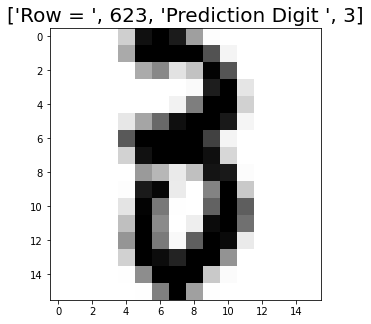

In [89]:
data_row=random_sampel_data[0][1:]
pixels = np.matrix(data_row)
pixels=pixels.reshape(16,16)
plt.rcParams["figure.figsize"] = (7,5)
plt.title(["Row = ", i, "Prediction Digit ", predicted_number[0]], fontsize=20)
plt.imshow(pixels, cmap='Greys')